In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
iris = pd.read_csv(r'iris1.csv')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data = iris.drop_duplicates(subset ="species",)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
iris.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

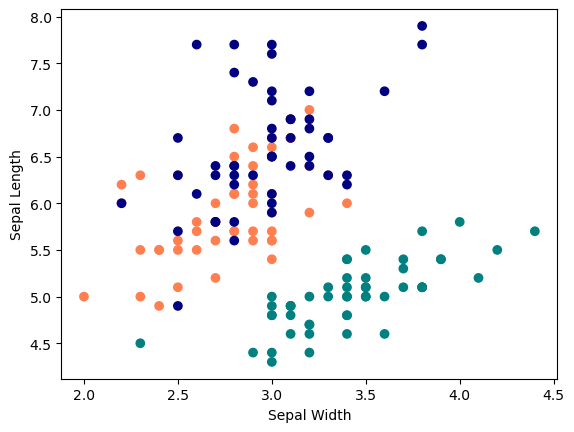

In [9]:
species_colors = {"Iris-setosa": "teal", "Iris-versicolor": "coral", "Iris-virginica": "navy"}

plt.scatter(iris["sepal_width"], iris["sepal_length"], c=iris["species"].map(species_colors))
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

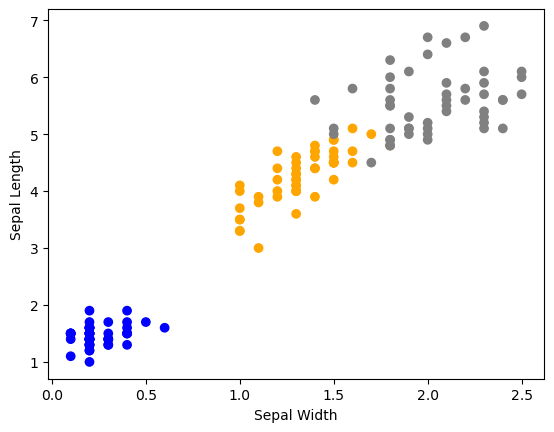

In [10]:
species_colors = {"Iris-setosa": "blue", "Iris-versicolor": "orange", "Iris-virginica": "gray"}

plt.scatter(iris["petal_width"], iris["petal_length"], c=iris["species"].map(species_colors))
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

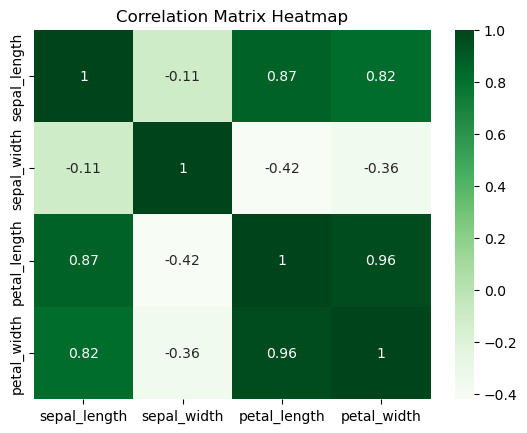

In [11]:
# Compute the correlation matrix
correlation_matrix = iris.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')

# Set the title
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

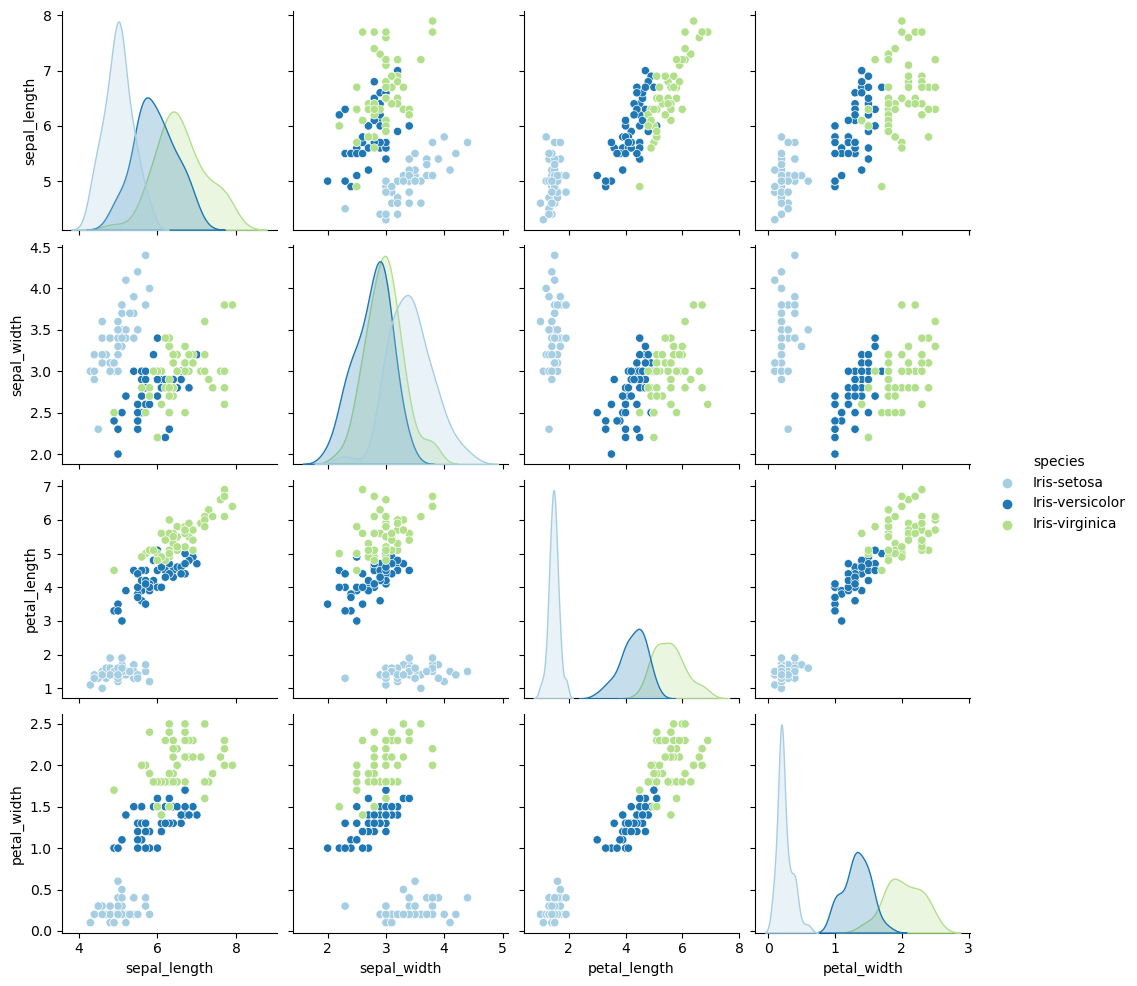

In [12]:

sns.pairplot(iris, hue='species',palette='Paired')

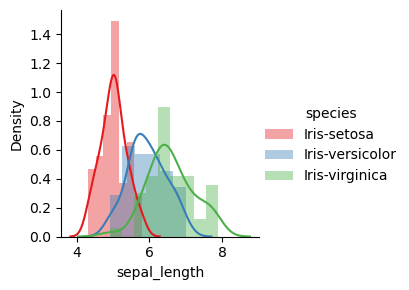

In [13]:
plot = sns.FacetGrid(iris, hue="species", palette="Set1")
plot.map(sns.distplot, "sepal_length",).add_legend()

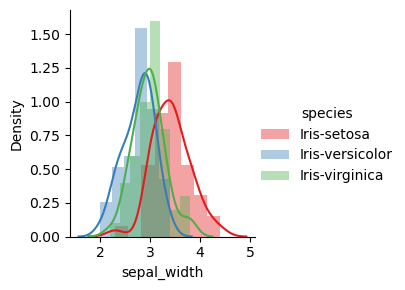

In [14]:
 plot = sns.FacetGrid(iris, hue="species",palette="Set1")
plot.map(sns.distplot, "sepal_width").add_legend()
 


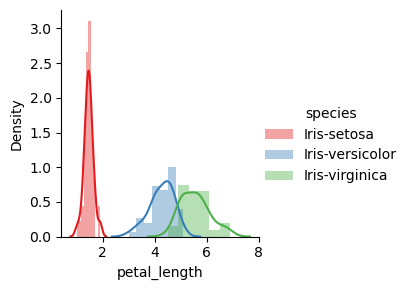

In [15]:
plot = sns.FacetGrid(iris, hue="species",palette="Set1" )
plot.map(sns.distplot, "petal_length").add_legend()
 


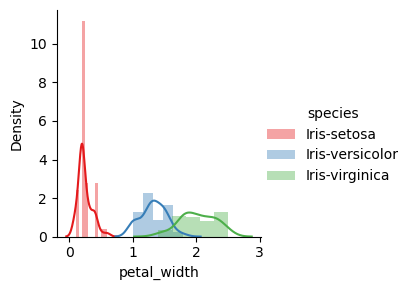

In [16]:
plot = sns.FacetGrid(iris, hue="species", palette="Set1")
plot.map(sns.distplot, "petal_width").add_legend()
 
plt.show()

In [17]:
print("Target Labels", iris["species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [18]:
x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
x_new = np.array([[3, 1.5, 1.8, 2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']
